
**This dataset contains a list of video games with sales greater than 16.6k copies with 11 columns. It was generated by a scrape of vgchartz.com.**

Breakdown of this notebook: Loading the dataset: Load the data and import the libraries.

**1. Data Cleaning:**

    Dropping Uncessary col's.
    Dropping duplicates.
    Checking Missing Value Percent with respect to each column.
    Dropping row's on having atleast one null value.
    Reanaming Column's
    Feature Transfomation

**2. Data Visualization**

    using bar graph
    using pie chart
    using histogram

**3. Regression Analysis**  
   
    Linear Regression.
    Random Forest Regression.



### **To find path of dataset**

In [21]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


### **Importing required libraries and loading data**

In [22]:
# important python libraries for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("../input/videogamesales/vgsales.csv") 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### The describe() method shows that count for <b>Year</b> is different which tells about missing values. The other statistics are also useful like min and max values in each column.

### **Removing duplicate and missing-value rows**

In [24]:
#dataset total rows without cleaning
print("Dataset shape before cleaning: ",df.shape)
#droping rows with at-least single missing value
data = df
data.dropna(how = "any",inplace = True)
print("Dataset shape after dropping row's with null valu's :",data.shape)
# droping duplicate values
data = data.drop_duplicates()
print("Dataset shape :",data.shape)


Dataset shape before cleaning:  (16598, 11)
Dataset shape after dropping row's with null valu's : (16291, 11)
Dataset shape : (16291, 11)


### **Rename columns and check missing value percentage**


In [25]:
#changing columns name into lower-case 
data.columns = map(lambda x: x.lower(), data.columns)
# let's rename some columns 
data.rename(columns = {"na_sales":"north_usa_sales",
                        "eu_sales":"europe_sales",
                        "jp_sales":"japan_sales"},inplace = True)


m_perc = pd.DataFrame(data.isnull().sum(),columns = ["missing percent"])
print(m_perc)


                 missing percent
rank                           0
name                           0
platform                       0
year                           0
genre                          0
publisher                      0
north_usa_sales                0
europe_sales                   0
japan_sales                    0
other_sales                    0
global_sales                   0


### **Feature Transformation**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             16291 non-null  int64  
 1   name             16291 non-null  object 
 2   platform         16291 non-null  object 
 3   year             16291 non-null  float64
 4   genre            16291 non-null  object 
 5   publisher        16291 non-null  object 
 6   north_usa_sales  16291 non-null  float64
 7   europe_sales     16291 non-null  float64
 8   japan_sales      16291 non-null  float64
 9   other_sales      16291 non-null  float64
 10  global_sales     16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
# feature transformation
data.Year = data.year.astype(int)

### **Exploring Data for different questions**  
#### **To find game with highest global sales**

In [28]:
max_sold = data.global_sales.max()
hgs_game = data[data.global_sales == max_sold]
hgs_game[["name","global_sales","year"]]

,name,global_sales,year
0,Wii Sports,82.74,2006.0


#### **To find game with lowest global sales**

In [29]:
min_sold = data.global_sales.min()
lgs_game = data[data.global_sales == min_sold]
lgs_game[["name","global_sales","year"]]

,name,global_sales,year
15980,Turok,0.01,2008.0
15981,Coven and Labyrinth of Refrain,0.01,2016.0
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01,2016.0
15983,Dragon Zakura DS,0.01,2007.0
15984,Chameleon: To Dye For!,0.01,2006.0
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01,2002.0
16594,Men in Black II: Alien Escape,0.01,2003.0
16595,SCORE International Baja 1000: The Official Game,0.01,2008.0
16596,Know How 2,0.01,2010.0


### **To visualize global average game sales year-wise**


Text(0.5, 1.0, 'Year wise global game sales :')

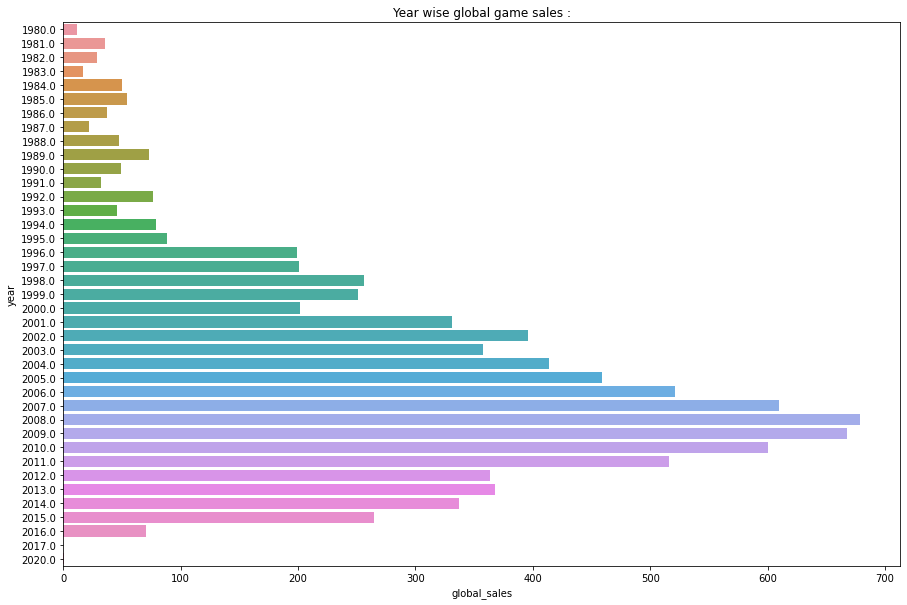

In [30]:
plt.rcParams['figure.figsize'] = (15,10)
year_wise_game_sales  = pd.pivot_table(data ,index = "year" ,
                                       values = "global_sales",
                                       aggfunc = np.sum)
sns.barplot(year_wise_game_sales["global_sales"],year_wise_game_sales.index,orient = "h")
plt.title("Year wise global game sales :")

### **Top 10 platform wise global sale's**

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

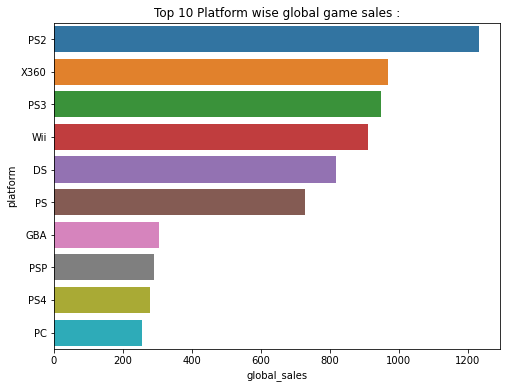

In [31]:
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(data ,index = "platform",
                                           values = "global_sales",
                                           aggfunc = np.sum)
#platform_wise_game_sales.sort_values("global_sales",ascending=False).head()
platform_wise_game_sales  = platform_wise_game_sales.sort_values(
                    by = "global_sales",ascending  = False).head(10)

sns.barplot(platform_wise_game_sales["global_sales"],platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Platform wise global game sales :")

### **listing genre wise top global sale's**

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

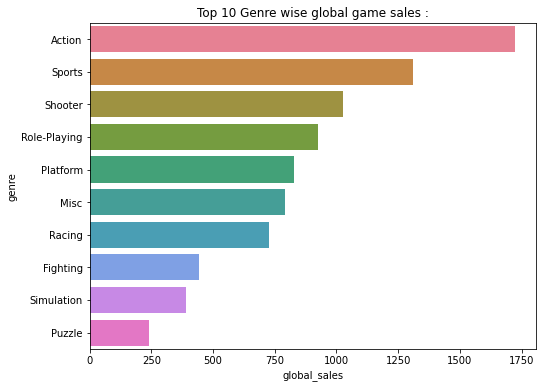

In [32]:
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales  = pd.pivot_table(data ,index = "genre",
                                        values = "global_sales",
                                        aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(
    by = "global_sales",ascending  = False).head(10)
sns.barplot(genre_wise_game_sales["global_sales"],genre_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Genre wise global game sales :")

### **Listing publisher wise top global game sales**

Text(0.5, 1.0, 'Top 10 Publisher wise global game sales :')

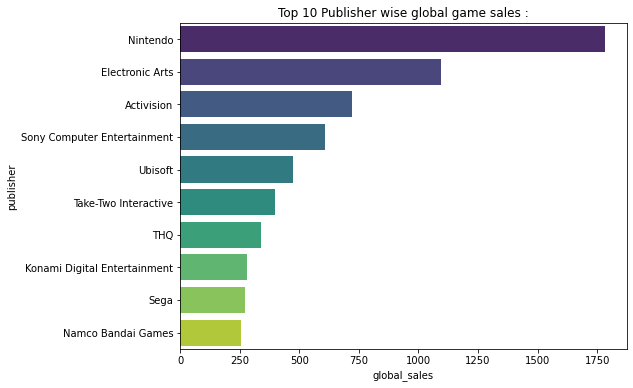

In [33]:
plt.rcParams['figure.figsize'] = (8,6)
publisher_wise_game_sales  = pd.pivot_table(data ,index = "publisher" ,values = "global_sales",aggfunc = np.sum)
publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(publisher_wise_game_sales["global_sales"],publisher_wise_game_sales.index,orient = "h",palette = "viridis")
plt.title("Top 10 Publisher wise global game sales :") 

### **Let's find Top 5 Best game's from Top Action Genre**

,name,global_sales
16,Grand Theft Auto V,21.40
17,Grand Theft Auto: San Andreas,20.81
24,Grand Theft Auto: Vice City,16.15
38,Grand Theft Auto III,13.10
45,Pokemon HeartGold/Pokemon SoulSilver,11.90


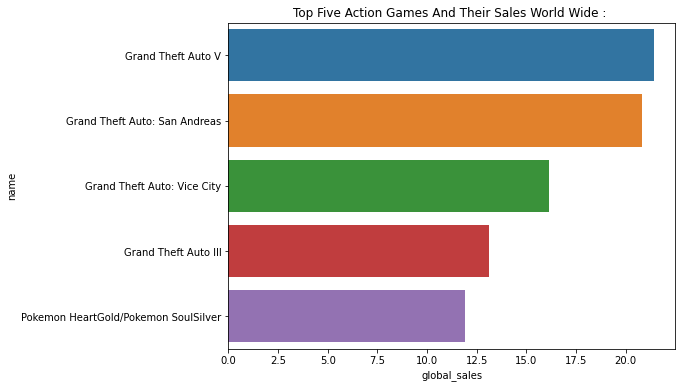

In [34]:
top_five_action_games = data[data.genre == "Action"][["name","global_sales"]]
top_five_action_games = top_five_action_games.sort_values(by = "global_sales",ascending = False )
top_five_action_games = top_five_action_games.drop_duplicates(["name"]).head(5)
sns.barplot(top_five_action_games["global_sales"],top_five_action_games["name"])
plt.title("Top Five Action Games And Their Sales World Wide : ")
top_five_action_games

### **Which is the highest sold Game in North_USA**

In [35]:
north_usa_highest_sold_game = data.north_usa_sales.max()
print("highest sold Game in North_USA :")
data[data["north_usa_sales"] == north_usa_highest_sold_game][["name","north_usa_sales"]]

highest sold Game in North_USA :


,name,north_usa_sales
0,Wii Sports,41.49


### **Total Sale's Year Wise**

Text(0, 0.5, 'avg global_sales')

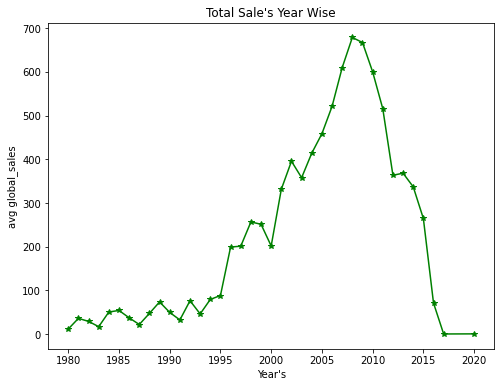

In [36]:
tot_sales_year_wise = pd.pivot_table(data,index = "year",values = "global_sales",aggfunc= np.sum)
#print(avg_sales_year_wise) #uncomment this to know Total sale's value's with respect each year.
plt.plot(tot_sales_year_wise.index,tot_sales_year_wise["global_sales"],color = 'g',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year's")
plt.ylabel("avg global_sales")

### **Re-prepare data for model**

In [37]:
# dropping columns
data2 = data.copy()

In [38]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i]=x_data[i].factorize()[0]
        
    return x_data    
    
x_data = data2.drop("global_sales",axis = 1)
y_data = data2["global_sales"]
x_data = data_encode(x_data)


### **Model Building**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)


### **Linear Regression**

In [41]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Linear Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ",adjusted_r2_score)                         
print("MSE for Linear Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.39280393275936454
adjusted_r2_score Value       :  0.3915589131423035
MSE for Linear Regression     :  1.1997259537051557


### **Random Forest Regressor**

In [42]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Random Forest Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Random Forest Reg model :  0.9951435656927355
adjusted_r2_score Value              :  0.995133607861472
MSE for Random Forest Regression     :  0.009595566564465764
